# 1. Data Overview

This section gives an overview of all the necessary data to train your model and how to download them.

## 1.1 Study Area

Data set is spread over 98 cities in Europe.The selection of the cities is primarily based on the availability of the population data.


## 1.2 Input Data

For each city above, we processed the following input data:

*Population data:* The European Statistical System (ESSnet) project, in co-operation with the European Forum for Geography and Statistics (EFGS), produced the high resolution (1km) population grids from the population census in Europe. We processed this freely available population grids for each city. 

*Sentinel-2 (SEN2):* Processed only the RGB bands at 10 m resolution for all four seasonal sets (spring, summer, autumn and winter) of Sentinel-2 images to capture the seasonal variation in the data.

*TanDEM-X Digital Elevation Model (DEM):*  Processed the freely available TanDEM-X 90m (3 arcsec) DEM global product that contains the final, global Digital Elevation Model of the landmasses of the Earth.

*Local climate zones (LCZ):* Processed the urban local climate zone classifications, So2Sat LCZ v1.0, produced by fusing the freely available satellite data from Sentinel-1 and Sentinel-2 satellites using deep learning.

*Nighttime lights (VIIRS):* Processed the freely available cloud free annual composites of global VIIRS nighttime lights.

*OpenStreetMap (OSM):* Processed the OSM features such as street density, street length, etc. for each city.

*Land use classification (LU):* Mapped OSM tags to a simplified land use classification scheme: commercial, industrial, residential, and other that results in a four band raster with corresponding land use proportions.


## 1.3 Data set Preparation

Using the processed input data from the step above, we created the patches for each city. The population grid of a city is used as a reference grid to crop all the other input data. The size of a grid cell in the population grid is 1 x1 km and each cell represents the population count living per square km of the cell. 

For some applications such as environmental impact assessments, land use analysis, climate change, etc. it is sufficient to know the range of the people living in an area. So, we further preprocessed the population grids by binning the population count to a population class. We assigned a grid cell, Class 0, if the population count of the cell is zero, C<sub>cell</sub>=0 if P<sub>cell</sub>=0 and subsequently C<sub>cell</sub>=1 if 2<sup>0</sup> $\leq$ P<sub>cell</sub> ${<}$ 2<sup>1</sup>, C<sub>cell</sub>=2 if 2<sup>1</sup> $\leq$ P<sub>cell</sub> ${<}$ 2<sup>2</sup>, C<sub>cell</sub>=3 if 2<sup>2</sup> $\leq$ P<sub>cell</sub> ${<}$ 2<sup>3</sup>.....C<sub>cell</sub>=${k+1}$ if 2<sup>k</sup> $\leq$ P<sub>cell</sub> ${<}$ 2<sup>k+1</sup> where k $\in$ $\mathbb{N}$. Thus, each grid cell has been assigned a population class depending on which bin its population count falls. It would give more flexibility to the end-users to develop either a regression or a classification model for the task considering the requirements of the application.


## 1.4 Data set Structure

Data Set consists of two parts, **So2Sat POP Part1** and **So2Sat POP Part2**.

*So2Sat POP Part1* consists of the patches from local climate zones, land use classification, nighttime lights, Open Street Map and its features, and from all seasons (autumn, summer, spring, winter) of Sentinel-2 imagery (RGB).

*So2Sat POP Part2* consists of patches from digital elevation model only.


## 1.5 Demo Data Loader 

Returns all the patches with attributes of a given data and their corresponding population count and population class labels
Note: Reads from both So2Sat POP Part1 and So2Sat POP Part2 data folders.



### Dependencies

Create a conda environment with python 3.8

**Packages:**

- matplotlib
- opencv-python
- pandas
- scikit-learn
- gdal
- rasterio


**Note:** Please note that to install GDAL and rasterio, you may need to download the binary wheels for your system (GDAL (https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal) and rasterio (https://www.lfd.uci.edu/~gohlke/pythonlibs/#rasterio)). Run from the downloads folder.

pip install GDAL-3.3.3-cp38-cp38-win_amd64.whl

pip install rasterio-1.2.10-cp38-cp38-win_amd64.whl

In [1]:
current_dir_path = "/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack"

In [2]:
# setting the paths to the train and test folders

import os

# paths to the current folder
if os.name == "nt":  # locally
    current_dir_path = os.getcwd()
    
# paths to So2Sat POP Part1 folder
all_patches_mixed_part1 = os.path.join(current_dir_path, 'So2Sat POP Part1')  # path to So2Sat POP Part 1 data folder
all_patches_mixed_train_part1 = os.path.join(all_patches_mixed_part1, 'train')   # path to train folder
all_patches_mixed_test_part1 = os.path.join(all_patches_mixed_part1, 'test')   # path to test folder

# paths to So2Sat POP Part2 folder
all_patches_mixed_part2 = os.path.join(current_dir_path, 'So2Sat POP Part2')  # path to So2Sat POP Part 2 data folder
all_patches_mixed_train_part2 = os.path.join(all_patches_mixed_part2, 'train')   # path to train folder
all_patches_mixed_test_part2 = os.path.join(all_patches_mixed_part2, 'test')   # path to test folder

In [3]:
print('Path to So2Sat POP Part1: ', all_patches_mixed_part1)
print('Path to So2Sat POP Part2: ', all_patches_mixed_part2)

Path to So2Sat POP Part1:  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/So2Sat POP Part1
Path to So2Sat POP Part2:  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/So2Sat POP Part2


In [4]:
from utils import get_fnames_labels


# load all the files and their corresponding population count and class for "sen2_rgb_autumn" data in "train" folder
X_train_sen2_rgb_autumn,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1,
                                                                           data='sen2_rgb_autumn')


# load all the files and their corresponding population count and class for "sen2_rgb_summer" data in "train" folder
X_train_sen2_rgb_summer,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1,
                                                                           data='sen2_rgb_summer')


# load all the files and their corresponding population count and class for "sen2_rgb_spring" data in "train" folder
X_train_sen2_rgb_spring,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1,
                                                                           data='sen2_rgb_spring')


# load all the files and their corresponding population count and class for "sen2_rgb_winter" data in "train" folder
X_train_sen2_rgb_winter,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1,
                                                                           data='sen2_rgb_winter')


# load all the files and their corresponding population count and class for "viirs" data in "train" folder
X_train_viirs,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1, data='viirs')


# load all the files and their corresponding population count and class for "lcz" data in "train" folder
X_train_lcz,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1, data='lcz')


# load all the files and their corresponding population count and class for "lu" data in "train" folder
X_train_lu,  y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1, data='lu')


# load all the files and their corresponding population count and class for "dem" data in "train" folder
X_train_dem, y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part2, data='dem')


# load all the files and their corresponding population count and class for "osm" data in "train" folder
X_train_osm, y_train_count, y_train_class = get_fnames_labels(all_patches_mixed_train_part1, data='osm_features')

print('All training instances are loaded')

All training instances are loaded


## 1.5 Demo Data Visualization
Plot the SEN2, DEM, LCZ, LU, VIIRS paches from train set

# 3 Baseline experiment: 

Selected the popular Random Forest (RF) algorithm, because of its flexibility, efficiency in handling the noisy input data, and relative resistance to overfitting. 

Implemented the supervised random forest algorithm for regression. The absolute population count is the response variable.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

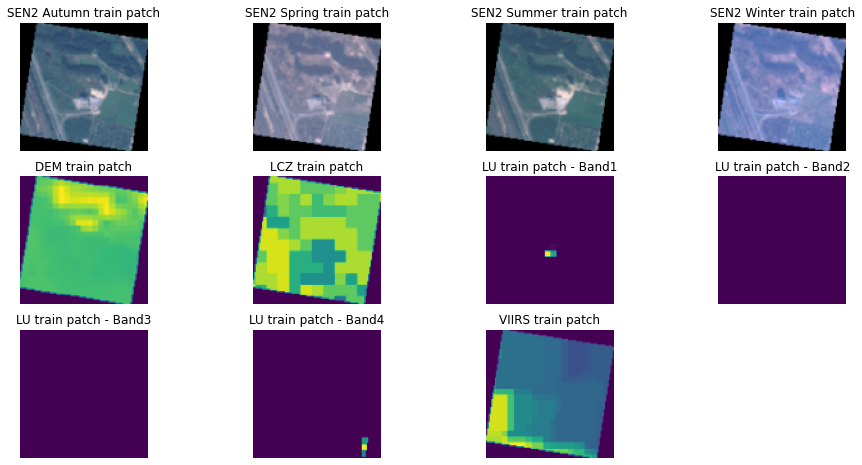

In [6]:
index = 2 # Index of the train patch to be plotted

fig = plt.figure(figsize=(16, 8))
spec = fig.add_gridspec(ncols=4, nrows=3)

# Plot SEN2 autumn patch at given index
ax = fig.add_subplot(spec[0, 0])
if np.max(X_train_sen2_rgb_autumn[index]) - np.min(X_train_sen2_rgb_autumn[index]) == 0:  # to avoid Division by zero
    ax.imshow(X_train_sen2_rgb_autumn[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_sen2_rgb_autumn[index] - np.min(X_train_sen2_rgb_autumn[index]))/(np.max(X_train_sen2_rgb_autumn[index]) - np.min(X_train_sen2_rgb_autumn[index])))
ax.set_title('SEN2 Autumn train patch')
ax.set_axis_off()

# Plot SEN2 spring patch at given index
ax = fig.add_subplot(spec[0, 1])
if np.max(X_train_sen2_rgb_spring[index]) - np.min(X_train_sen2_rgb_spring[index]) == 0: # to avoid Division by zero
    ax.imshow(X_train_sen2_rgb_spring[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_sen2_rgb_spring[index] - np.min(X_train_sen2_rgb_spring[index]))/(np.max(X_train_sen2_rgb_spring[index]) - np.min(X_train_sen2_rgb_spring[index])))
ax.set_title('SEN2 Spring train patch')
ax.set_axis_off()

# Plot SEN2 summer patch at given index
ax = fig.add_subplot(spec[0, 2])
if np.max(X_train_sen2_rgb_summer[index]) - np.min(X_train_sen2_rgb_summer[index]) == 0: # to avoid Division by zero
    ax.imshow(X_train_sen2_rgb_summer[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_sen2_rgb_summer[index] - np.min(X_train_sen2_rgb_summer[index]))/(np.max(X_train_sen2_rgb_summer[index]) - np.min(X_train_sen2_rgb_summer[index])))
ax.set_title('SEN2 Summer train patch')
ax.set_axis_off()

# Plot SEN2 winter patch at given index
ax = fig.add_subplot(spec[0, 3])
if np.max(X_train_sen2_rgb_winter[index]) - np.min(X_train_sen2_rgb_winter[index]) == 0: # to avoid Division by zero
    ax.imshow(X_train_sen2_rgb_winter[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_sen2_rgb_winter[index] - np.min(X_train_sen2_rgb_winter[index]))/(np.max(X_train_sen2_rgb_winter[index]) - np.min(X_train_sen2_rgb_winter[index])))
ax.set_title('SEN2 Winter train patch')
ax.set_axis_off()

# Plot DEM patch at given index
ax = fig.add_subplot(spec[1, 0])
if np.max(X_train_dem[index]) - np.min(X_train_dem[index]) == 0: # to avoid Division by zero
    ax.imshow(X_train_dem[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_dem[index] - np.min(X_train_dem[index]))/(np.max(X_train_dem[index]) - np.min(X_train_dem[index])))
ax.set_title('DEM train patch')
ax.set_axis_off()

# Plot LCZ patch at given index
ax = fig.add_subplot(spec[1, 1])
if np.max(X_train_lcz[index]) - np.min(X_train_lcz[index]) == 0: # to avoid Division by zero
    ax.imshow(X_train_lcz[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_lcz[index] - np.min(X_train_lcz[index]))/(np.max(X_train_lcz[index]) - np.min(X_train_lcz[index])))
ax.set_title('LCZ train patch')
ax.set_axis_off()

# Plot LU patch at given index
ax = fig.add_subplot(spec[1, 2])
if np.max(X_train_lu[index][:,:,0]) - np.min(X_train_lu[index][:,:,0]) == 0: # to avoid Division by zero
    ax.imshow(X_train_lu[index][:,:,0])
else:
    # normalizing for plotting
    ax.imshow((X_train_lu[index][:,:,0] - np.min(X_train_lu[index][:,:,0]))/(np.max(X_train_lu[index][:,:,0]) - np.min(X_train_lu[index][:,:,0])))
ax.set_title('LU train patch - Band1')
ax.set_axis_off()

# Plot LU patch at given index
ax = fig.add_subplot(spec[1, 3])
if np.max(X_train_lu[index][:,:,1]) - np.min(X_train_lu[index][:,:,1]) == 0: # to avoid Division by zero 
    ax.imshow(X_train_lu[index][:,:,1])
else:
    # normalizing for plotting
    ax.imshow((X_train_lu[index][:,:,1] - np.min(X_train_lu[index][:,:,1]))/(np.max(X_train_lu[index][:,:,1]) - np.min(X_train_lu[index][:,:,1])))
ax.set_title('LU train patch - Band2')
ax.set_axis_off()

# Plot LU patch at given index
ax = fig.add_subplot(spec[2, 0])
if np.max(X_train_lu[index][:,:,2]) - np.min(X_train_lu[index][:,:,2]) == 0: # to avoid Division by zero
    ax.imshow(X_train_lu[index][:,:,2])
else:
    # normalizing for plotting
    ax.imshow((X_train_lu[index][:,:,2] - np.min(X_train_lu[index][:,:,2]))/(np.max(X_train_lu[index][:,:,2]) - np.min(X_train_lu[index][:,:,2])))
ax.set_title('LU train patch - Band3')
ax.set_axis_off()

# Plot LU patch at given index
ax = fig.add_subplot(spec[2, 1])
if np.max(X_train_lu[index][:,:,3]) - np.min(X_train_lu[index][:,:,3]) == 0: # to avoid Division by zero
    ax.imshow(X_train_lu[index][:,:,3])
else:
    # normalizing for plotting
    ax.imshow((X_train_lu[index][:,:,3] - np.min(X_train_lu[index][:,:,3]))/(np.max(X_train_lu[index][:,:,3]) - np.min(X_train_lu[index][:,:,3])))
ax.set_title('LU train patch - Band4')
ax.set_axis_off()

# Plot VIIRS patch at given index
ax = fig.add_subplot(spec[2, 2])
if np.max(X_train_viirs[index]) - np.min(X_train_viirs[index]) == 0: # to avoid Division by zero
    ax.imshow(X_train_viirs[index])
else:
    # normalizing for plotting
    ax.imshow((X_train_viirs[index] - np.min(X_train_viirs[index]))/(np.max(X_train_viirs[index]) - np.min(X_train_viirs[index])))
ax.set_title('VIIRS train patch')
ax.set_axis_off()


# 2 Data Preprocessing: 

For each city folder creates a city_name_features.csv file with 125 features in So2Sat POP Part1 folder, this feature set is used for Random Forest training.

In [7]:
# create features for training and testing data from So2Sat POP Part1 and So2Sat POP Part2
from utils import feature_engineering

feature_folder = feature_engineering(all_patches_mixed_part1)
feature_folder = feature_engineering(all_patches_mixed_part2)


Preparing features for So2sat Part1
city_csv_file /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/So2Sat POP Part1/train/01120_22136_gdansk/01120_22136_gdansk.csv
City 01120_22136_gdansk finished
City 01486_22146_lublin finished
All cities processed for So2Sat POP Part 1 

Preparing features for So2sat Part2
City 01120_22136_gdansk finished
City 01486_22146_lublin finished
All cities processed for So2Sat POP Part 2 



# Load all utils

In [8]:
from utils import validation_reg, get_perf

from rf_regression import rf_regressor
from adaboost_regression import adaboost_regressor
from gradientboosting_regression import gradientboosting_regressor
from voting_regression import voting_regressor

## Random Forest

Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_regression.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Creation of feature importance plot...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_regression.py:142: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-143509_rf_reg/20220519-143509_rf_reg_predictions.csv
Mean absolute error of prediction (MAE):  1102.007
Root mean squared error of prediction (RMSE):  2075.675
R squared :  0.649

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-143509_rf_reg/20220519-143509_rf_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/adaboost_regression.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Creation of feature importance plot...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/adaboost_regression.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-143528_ada_reg/20220519-143528_ada_reg_predictions.csv
Mean absolute error of prediction (MAE):  1061.092
Root mean squared error of prediction (RMSE):  1651.098
R squared :  0.727

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-143528_ada_reg/20220519-143528_ada_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/gradientboosting_regression.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Creation of feature importance plot...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/gradientboosting_regression.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144255_gb_reg/20220519-144255_gb_reg_predictions.csv
Mean absolute error of prediction (MAE):  1075.52
Root mean squared error of prediction (RMSE):  2062.231
R squared :  0.61

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144255_gb_reg/20220519-144255_gb_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/voting_regression.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/voting_regression.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144348_voting_reg/20220519-144348_voting_reg_predictions.csv
Mean absolute error of prediction (MAE):  1192.399
Root mean squared error of prediction (RMSE):  2023.388
R squared :  0.671

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144348_voting_reg/20220519-144348_voting_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_regression.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Creation of feature importance plot...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_regression.py:142: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144401_rf_reg/20220519-144401_rf_reg_predictions.csv
Mean absolute error of prediction (MAE):  1102.007
Root mean squared error of prediction (RMSE):  2075.675
R squared :  0.649

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144401_rf_reg/20220519-144401_rf_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/adaboost_regression.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Creation of feature importance plot...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/adaboost_regression.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144415_ada_reg/20220519-144415_ada_reg_predictions.csv
Mean absolute error of prediction (MAE):  1077.75
Root mean squared error of prediction (RMSE):  1751.245
R squared :  0.699

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144415_ada_reg/20220519-144415_ada_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/gradientboosting_regression.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Creation of feature importance plot...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/gradientboosting_regression.py:133: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144715_gb_reg/20220519-144715_gb_reg_predictions.csv
Mean absolute error of prediction (MAE):  1222.954
Root mean squared error of prediction (RMSE):  2300.799
R squared :  0.618

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144715_gb_reg/20220519-144715_gb_reg_validations_log.txt 
 
Finished regression
Starting regression
Starting training...



/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/voting_regression.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(city_df, ignore_index=True)  # append data from all the training cities


Starting Grid search with cross validation...

Starting testing...

Predictions save at  /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144745_voting_reg/20220519-144745_voting_reg_predictions.csv
Mean absolute error of prediction (MAE):  1188.337
Root mean squared error of prediction (RMSE):  2034.088
R squared :  0.67

Please check detailed log at /local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/rf_logs/20220519-144745_voting_reg/20220519-144745_voting_reg_validations_log.txt 
 


/local_home/trao_ka/projects/helmholtz_challenges/countMeIn/starter-pack/voting_regression.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(test_city_df, ignore_index=True)  # append all test cities together
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/local_home/trao_ka/anaconda3/envs/countMeIn/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Finished regression


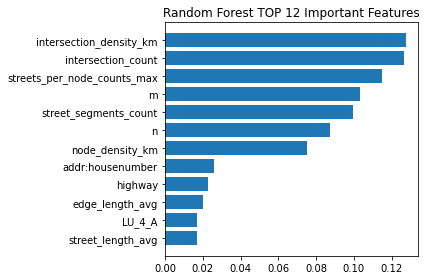

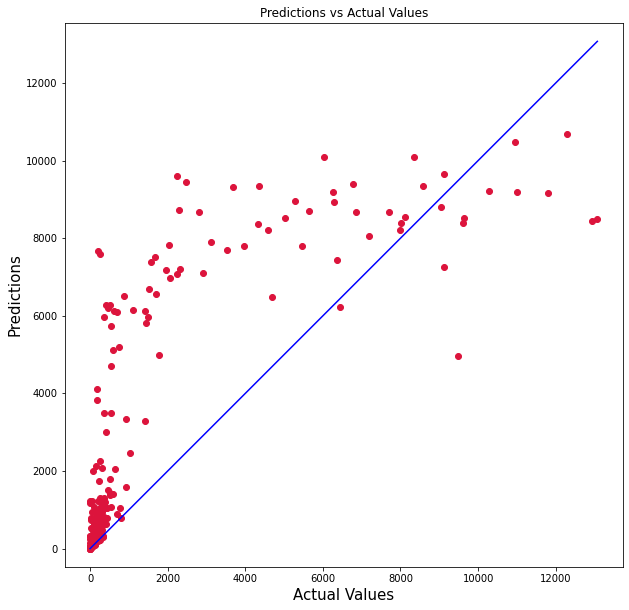

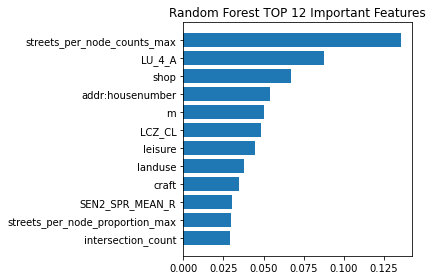

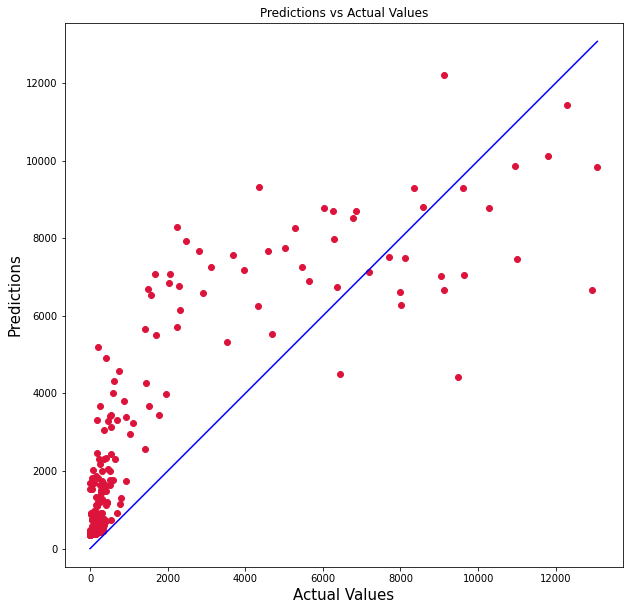

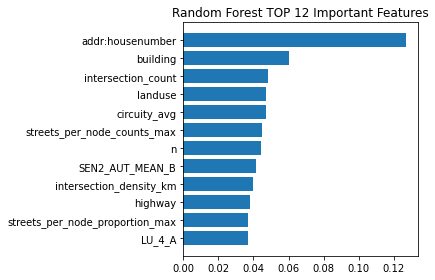

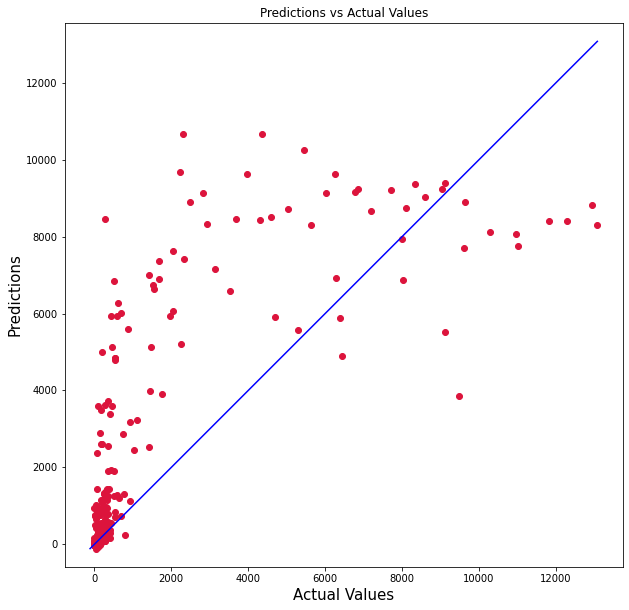

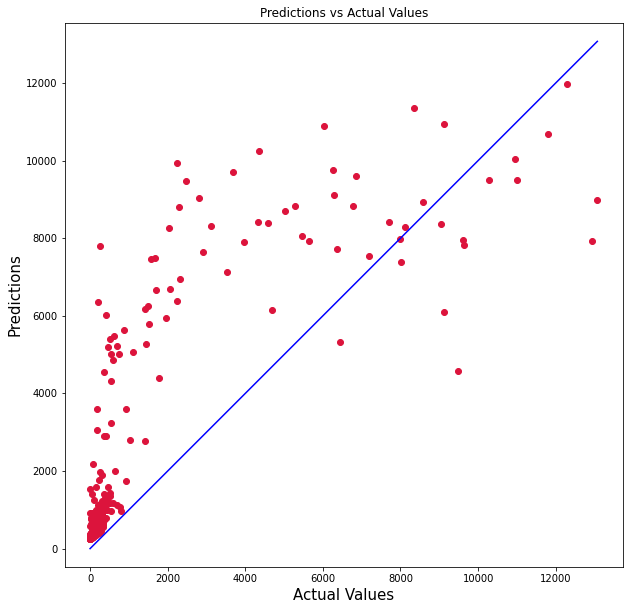

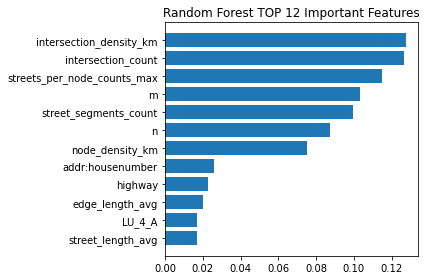

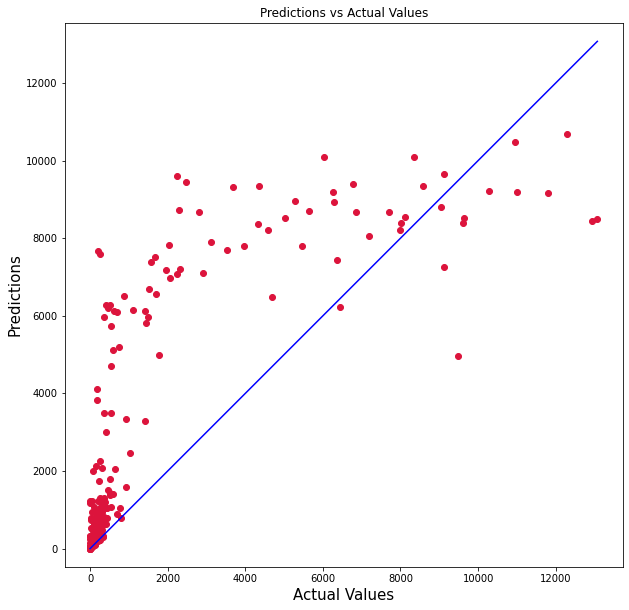

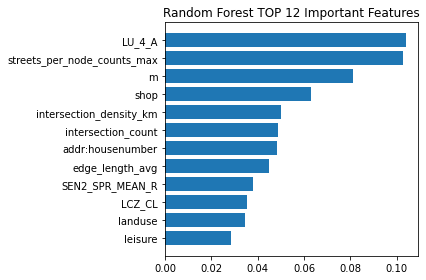

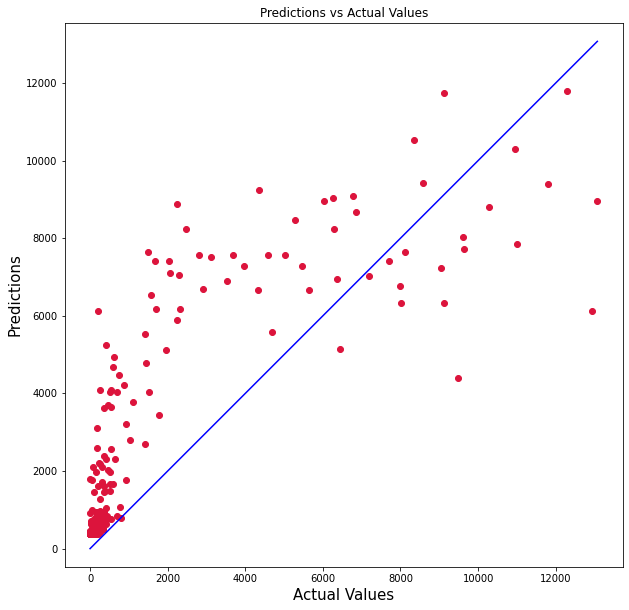

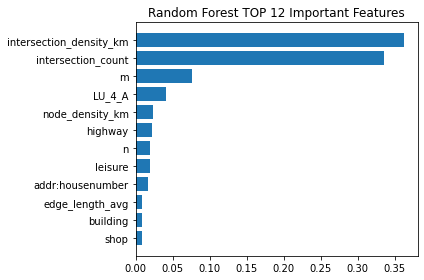

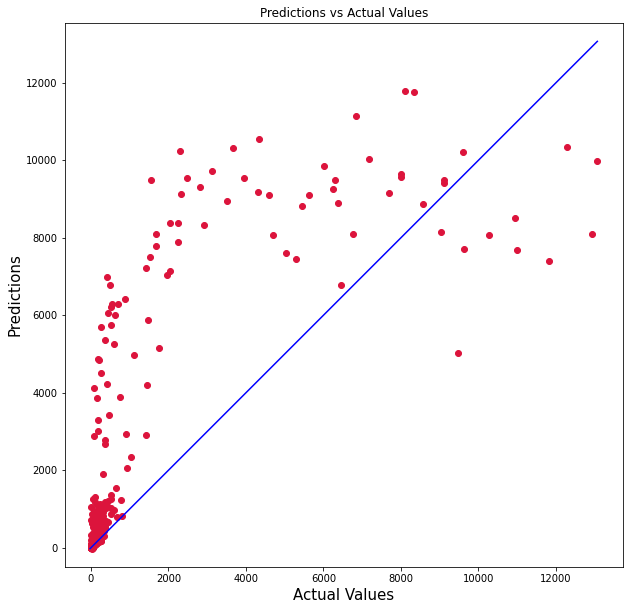

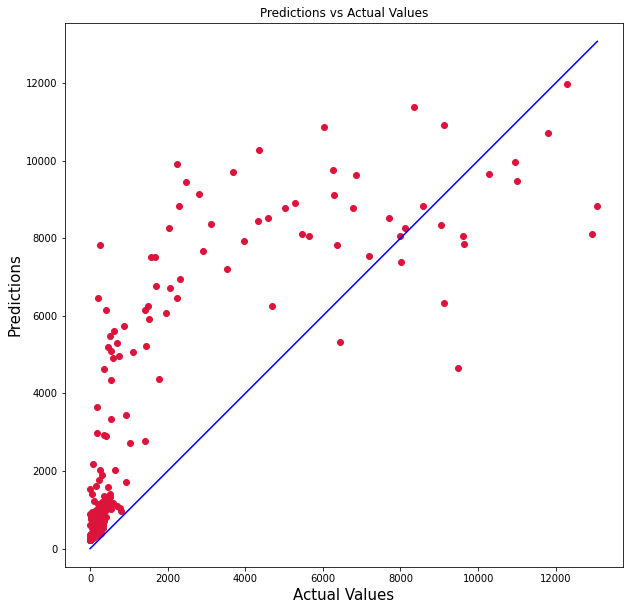

In [9]:
seed = 999

list_hp_strategies = ['grid', 'halving']
results_based_on_tuning = {}
for hp_strategy_i in list_hp_strategies:
    ## Random Forest
    prediction_csv_RF = rf_regressor(feature_folder, hp_strategy=hp_strategy_i, seed=seed)
    print('Predictions save at ', prediction_csv_RF)

    # This validation runs only on the sample data set and just for your reference. 
    validation_csv_path_RF = prediction_csv_RF.replace('prediction', 'validation')
    validation_reg(prediction_csv_RF, validation_csv_path_RF, all_patches_mixed_test_part1)


    ### Adaboost
    prediction_csv_ADA = adaboost_regressor(feature_folder, hp_strategy=hp_strategy_i, seed=seed)
    print('Predictions save at ', prediction_csv_ADA)

    # This validation runs only on the sample data set and just for your reference. 
    validation_csv_path_ADA = prediction_csv_ADA.replace('prediction', 'validation')
    validation_reg(prediction_csv_ADA, validation_csv_path_ADA, all_patches_mixed_test_part1)


    ## Gradient Boosting
    prediction_csv_GB = gradientboosting_regressor(feature_folder, hp_strategy=hp_strategy_i, seed=seed)
    print('Predictions save at ', prediction_csv_GB)

    # This validation runs only on the sample data set and just for your reference. 
    validation_csv_path_GB = prediction_csv_GB.replace('prediction', 'validation')
    validation_reg(prediction_csv_GB, validation_csv_path_GB, all_patches_mixed_test_part1)

    ## Voting
    prediction_csv_voting = voting_regressor(feature_folder, hp_strategy=hp_strategy_i, seed=seed)
    print('Predictions save at ', prediction_csv_voting)

    # This validation runs only on the sample data set and just for your reference. 
    validation_csv_path_voting = prediction_csv_voting.replace('prediction', 'validation')
    validation_reg(prediction_csv_voting, validation_csv_path_voting, all_patches_mixed_test_part1)

    mae_RF, rmse_RF, rsq_RF = get_perf(prediction_csv_RF, 
                                       validation_csv_path_RF, 
                                       all_patches_mixed_test_part1)

    mae_ADA, rmse_ADA, rsq_ADA = get_perf(prediction_csv_ADA, 
                                          validation_csv_path_ADA, 
                                          all_patches_mixed_test_part1)

    mae_GB, rmse_GB, rsq_GB = get_perf(prediction_csv_GB, 
                                       validation_csv_path_GB, 
                                       all_patches_mixed_test_part1)

    mae_VOTING, rmse_VOTING, rsq_VOTING = get_perf(prediction_csv_voting, 
                                       validation_csv_path_voting, 
                                       all_patches_mixed_test_part1)

    all_maes = [mae_GB, mae_RF, mae_ADA, mae_VOTING]
    all_rmses = [rmse_GB, rmse_RF, rmse_ADA, rmse_VOTING]
    all_rsqs = [rsq_GB, rsq_RF, rsq_ADA, rsq_VOTING]
    
    results_based_on_tuning[hp_strategy_i] = [all_maes, all_rmses, all_rsqs]

## Ploting of results

In [10]:
list_hp_strategies = ['grid', 'halving']
list_models = ['gb', 'rf', 'ada', 'voting']

# preprocessing
dict_maes = dict()
dict_rmses = dict()
dict_rsqs = dict()

for m_i in list_models:
    dict_maes[m_i] = list()
    dict_rmses[m_i] = list()
    dict_rsqs[m_i] = list()

for hp_str_i in list_hp_strategies:
    
    all_maes, all_rmses, all_rsqs = results_based_on_tuning[hp_str_i]
    for metric_list, metric_name in [(all_maes, 'MAE'), (all_rmses, 'RMSE'), (all_rsqs, 'R-squared')]:
        
        
        metric_i_gb, metric_i_rf, metric_i_ada, metric_i_voting = metric_list
        if metric_name == 'MAE':
            dict_maes['gb'].append(metric_i_gb)
            dict_maes['rf'].append(metric_i_rf)
            dict_maes['ada'].append(metric_i_ada)
            dict_maes['voting'].append(metric_i_voting)
        elif metric_name == 'RMSE':
            dict_rmses['gb'].append(metric_i_gb)
            dict_rmses['rf'].append(metric_i_rf)
            dict_rmses['ada'].append(metric_i_gb)
            dict_rmses['voting'].append(metric_i_voting)
        elif metric_name == 'R-squared':
            dict_rsqs['gb'].append(metric_i_gb)
            dict_rsqs['rf'].append(metric_i_rf)
            dict_rsqs['ada'].append(metric_i_ada)
            dict_rsqs['voting'].append(metric_i_voting)


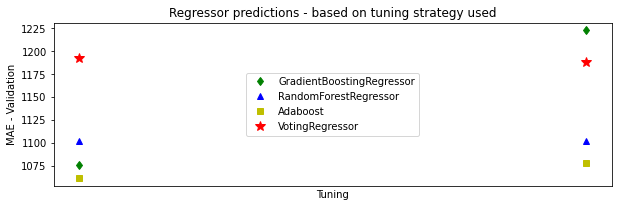

In [11]:
plt.figure(figsize=(10,3))

metric_i_gb, metric_i_rf, metric_i_ada, metric_i_voting = metric_list

plt.plot(list_hp_strategies, dict_maes['gb'], "gd", label="GradientBoostingRegressor")
plt.plot(list_hp_strategies, dict_maes['rf'], "b^", label="RandomForestRegressor")
plt.plot(list_hp_strategies, dict_maes['ada'], "ys", label="Adaboost")
plt.plot(list_hp_strategies, dict_maes['voting'], "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel( "MAE - Validation")
plt.xlabel("Tuning")
plt.legend(loc="center")
plt.title("Regressor predictions - based on tuning strategy used")

plt.show()

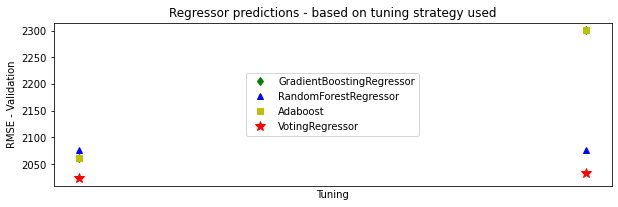

In [12]:
plt.figure(figsize=(10,3))

metric_i_gb, metric_i_rf, metric_i_ada, metric_i_voting = metric_list

plt.plot(list_hp_strategies, dict_rmses['gb'], "gd", label="GradientBoostingRegressor")
plt.plot(list_hp_strategies, dict_rmses['rf'], "b^", label="RandomForestRegressor")
plt.plot(list_hp_strategies, dict_rmses['ada'], "ys", label="Adaboost")
plt.plot(list_hp_strategies, dict_rmses['voting'], "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel( "RMSE - Validation")
plt.xlabel("Tuning")
plt.legend(loc="center")
plt.title("Regressor predictions - based on tuning strategy used")

plt.show()

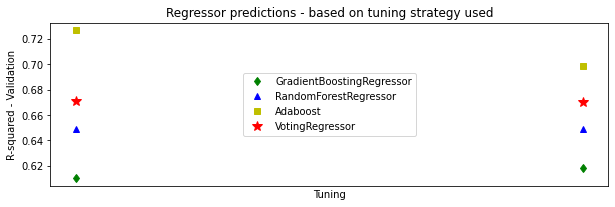

In [13]:
plt.figure(figsize=(10,3))

metric_i_gb, metric_i_rf, metric_i_ada, metric_i_voting = metric_list

plt.plot(list_hp_strategies, dict_rsqs['gb'], "gd", label="GradientBoostingRegressor")
plt.plot(list_hp_strategies, dict_rsqs['rf'], "b^", label="RandomForestRegressor")
plt.plot(list_hp_strategies, dict_rsqs['ada'], "ys", label="Adaboost")
plt.plot(list_hp_strategies, dict_rsqs['voting'], "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel( "R-squared - Validation")
plt.xlabel("Tuning")
plt.legend(loc="center")
plt.title("Regressor predictions - based on tuning strategy used")

plt.show()